In [62]:
import pandas as pd
import numpy as np

def rev_dict(aDict, rev=True):
    return dict(sorted(aDict.items(), reverse=rev, key=lambda x:x[1]))

from collections import Counter

# imports
import ast
import networkx as nx
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

# Strongly connected components (GePhi computation)

In [3]:
nodes = pd.read_csv('GePhi_nodes_export.csv')
nodes.head()

,Id,Label,timeset,species,origin,gender,status,indegree,outdegree,degree,...,harmonicclosnesscentrality,betweenesscentrality,Authority,Hub,modularity_class,pageranks,componentnumber,strongcompnum,clustering,eigencentrality
0,Abandoned Jerrys,Abandoned Jerrys,NaN,Human,Earth,Male,Alive,0,1,1,...,0.304877,0.000000,0.000000,0.009046,8,0.000331,0,6,0.000000,0.000000
1,Abrodolph Lincoler,Abrodolph Lincoler,NaN,Human,unknown,Male,unknown,5,4,9,...,0.367120,0.000246,0.012880,0.060154,9,0.001481,0,5,0.357143,0.017329
2,Adam,Adam,NaN,Humanoid,Narnia Dimension,Male,Dead,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0,0.000331,1,7,0.000000,0.000000
3,Adjudicator Rick,Adjudicator Rick,NaN,Human,unknown,Male,Dead,1,1,2,...,0.271868,0.000000,0.000114,0.002486,9,0.000471,0,8,0.500000,0.000786
4,Afro Rick,Afro Rick,NaN,Human,Earth (Dimension E-33),Male,Alive,2,7,9,...,0.381768,0.000114,0.005644,0.064287,9,0.000506,0,12,0.428571,0.002330


In [5]:
nodes.columns

Index(['Id', 'Label', 'timeset', 'species', 'origin', 'gender', 'status',
       'indegree', 'outdegree', 'degree', 'Eccentricity', 'closnesscentrality',
       'harmonicclosnesscentrality', 'betweenesscentrality', 'Authority',
       'Hub', 'modularity_class', 'pageranks', 'componentnumber',
       'strongcompnum', 'clustering', 'eigencentrality'],
      dtype='object')

In [81]:
char_strongID = dict(zip(nodes.Label.values, nodes.strongcompnum.values))
counter_strongID = dict(Counter(nodes.strongcompnum.values))
counter_strongID = rev_dict(counter_strongID)
list(counter_strongID.items())[:10]

[(5, 201),
 (50, 7),
 (88, 7),
 (12, 5),
 (38, 5),
 (131, 5),
 (36, 4),
 (39, 4),
 (59, 4),
 (67, 4)]

In [33]:
print([k for k,v in char_strongID.items() if v==88])

['Farmer Rick', 'Glasses Morty', 'Lizard Morty', 'Lizard Rick', 'Slick Morty', 'Slow Rick', 'Teacher Rick']


# Centrality Measures

In [49]:
df_characters = pd.read_csv("RaM_characters_wRelationsAndAttributes_final.csv")

def add_node(row, aGraph):
    """ Add the node given in row to global network """
    aGraph.add_node(row.Name, species=row.Species, origin=row.Origin, gender = row.Gender, status = row.Status)

def add_edges(row, aGraph):
    """ Add all edges which concern given character in row"""
    char_name = row.Name
    char_relations = ast.literal_eval(row.Relations)
    for aTargetRelation in char_relations:
        aGraph.add_edge(char_name,aTargetRelation)
        
# Create the associate graph with all attributes : role, race, genre, contentLength
G = nx.DiGraph()
_ = df_characters.apply(add_node, args=(G,), axis=1)
_ = df_characters.apply(add_edges, args=(G,), axis=1)

# Extract the Giant Connected Component, GCC
GCC = nx.weakly_connected_components(G)
GCC = list(GCC)
GCC.sort(key=len)
concerned_nodes = GCC[-1]

GCC = G.subgraph(concerned_nodes).copy()

# make G undirected
GU = G.to_undirected()

In [82]:
N=10

closeness_centrality_dict = nx.algorithms.centrality.closeness_centrality(G)
closeness_centrality_dict = dict(sorted(closeness_centrality_dict.items(), reverse=True, key=lambda item: item[1]))
print(N, "most central characters according to closeness centrality : ")
for i in range (N):
    character_name_i = list(closeness_centrality_dict.keys())[i]
    print(f"- {character_name_i} : {closeness_centrality_dict[character_name_i]}")

10 most central characters according to closeness centrality : 
- Rick Sanchez : 0.5961513321306247
- Morty Smith : 0.5602486608678559
- Jerry Smith : 0.44249728303058533
- Summer Smith : 0.4371776435624581
- Beth Smith : 0.42966438653023536
- Diane Sanchez : 0.4056973061456888
- Morty Jr. : 0.40446667731005975
- Naruto Smith : 0.401624040019728
- Jerry Smith (Cronenberged dimension) : 0.4012212074820954
- Birdperson : 0.3980274068255215


In [83]:
degree_centrality_dict = nx.algorithms.centrality.degree_centrality(G)
degree_centrality_dict = dict(sorted(degree_centrality_dict.items(), reverse=True, key=lambda item: item[1]))
print(N, "most central characters according to degree centrality : ")
for i in range (N):
    character_name_i = list(degree_centrality_dict.keys())[i]
    print(f"- {character_name_i} : {degree_centrality_dict[character_name_i]}")

10 most central characters according to degree centrality : 
- Rick Sanchez : 0.5867446393762183
- Morty Smith : 0.50682261208577
- Jerry Smith : 0.2046783625730994
- Summer Smith : 0.18128654970760233
- Beth Smith : 0.15984405458089668
- Council of Ricks : 0.07797270955165692
- Tammy Guterman : 0.07212475633528265
- Memory Parasites : 0.07017543859649122
- Evil Morty : 0.07017543859649122
- Hemorrhage : 0.06432748538011696


In [78]:
betweeness_centrality_dict = nx.betweenness_centrality(G)
betweeness_centrality_dict = dict(sorted(betweeness_centrality_dict.items(), reverse=True, key=lambda item: item[1]))
print(N, "most central characters according to betweeness centrality : ")
for i in range (N):
    character_name_i = list(betweeness_centrality_dict.keys())[i]
    print(f"- {character_name_i} : {betweeness_centrality_dict[character_name_i]}")

10 most central characters according to betweeness centrality : 
- Rick Sanchez : 0.18093429831411695
- Morty Smith : 0.11162821169399144
- Jerry Smith : 0.04522779652583261
- Beth Smith : 0.031072139172692633
- Summer Smith : 0.027309212023106
- Memory Parasites : 0.024339875242522315
- Council of Ricks : 0.01628576117006055
- Sleepy Gary : 0.015257961365860578
- Gromflomites : 0.014251373288534342
- Mr. Poopybutthole : 0.013336208744391759


In [79]:
eigenvector_centrality_dict = nx.algorithms.centrality.eigenvector_centrality(G)
eigenvector_centrality_dict = dict(sorted(eigenvector_centrality_dict.items(), reverse=True, key=lambda item: item[1]))
print(N,"most central characters according to eigenvector centrality : ")
for i in range (N):
    character_name_i = list(eigenvector_centrality_dict.keys())[i]
    print(f"- {character_name_i} : {eigenvector_centrality_dict[character_name_i]}")

10 most central characters according to eigenvector centrality : 
- Morty Smith : 0.3849246053437887
- Rick Sanchez : 0.3780159256209327
- Summer Smith : 0.28444539545797176
- Jerry Smith : 0.27897535624443803
- Beth Smith : 0.26562871014254896
- Morty Jr. : 0.2103325155302278
- Diane Sanchez : 0.20910509293133706
- Joyce Smith : 0.18450901321391275
- Leonard Smith : 0.1735347170368146
- Unnamed Uncle : 0.16115967506660234


## Assortativity

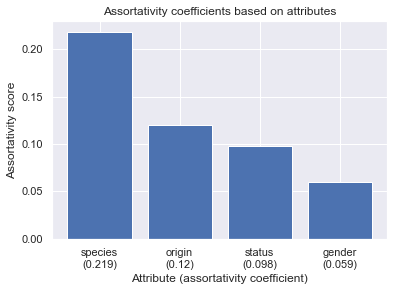

In [65]:
assort_coeffs = {}
attributes_list = ['species','gender','origin','status']

for a in attributes_list:
    assort_coeffs[a] =  nx.algorithms.assortativity.attribute_assortativity_coefficient(G, a)

assort_coeffs = rev_dict(assort_coeffs)

plt.bar(list(range(len(attributes_list))), assort_coeffs.values())
plt.xticks(list(range(len(attributes_list))), [k+f'\n({round(assort_coeffs[k],3)})' for k in assort_coeffs.keys()])
plt.xlabel("Attribute (assortativity coefficient)")
plt.ylabel('Assortativity score')
plt.title("Assortativity coefficients based on attributes")
plt.show()

# HITS algorithm

In [71]:
hubs_dict, authority_dict = nx.algorithms.link_analysis.hits_alg.hits(G)
hubs_dict, authority_dict = rev_dict(hubs_dict), rev_dict(authority_dict)

In [72]:
authority_dict

{'Rick Sanchez': 0.140379077565602,
 'Morty Smith': 0.12828213566509258,
 'Jerry Smith': 0.041765400547439324,
 'Summer Smith': 0.041587393140941196,
 'Beth Smith': 0.037638188172540596,
 'Diane Sanchez': 0.016563282748409087,
 'Morty Jr.': 0.014856393450608707,
 'Council of Ricks': 0.013581651169515352,
 'Hemorrhage': 0.013083883551581304,
 'Joyce Smith': 0.013066373721876641,
 'Tammy Guterman': 0.012817889293584638,
 'Leonard Smith': 0.012447176573502448,
 'Unnamed Uncle': 0.011865021175479041,
 "Rick's Father": 0.011541825105805668,
 'Evil Morty': 0.011476917253906304,
 'Birdperson': 0.011401308444182509,
 'Jessica': 0.011039651641453381,
 'Gwendolyn': 0.010652390109273971,
 'Ethan': 0.01058148898676608,
 'Evil Rick Sanchez': 0.010306811363138834,
 'Jerry Smith (Cronenberged dimension)': 0.010258090393757194,
 'Naruto Smith': 0.009270586572387322,
 'Gromflomites': 0.008602388267727556,
 'Summer Smith (Cronenberged dimension)': 0.0071897404925021086,
 'Snuffles': 0.006897219364074458